# Regressione lineare (parte 1 - max 1.5 punti)
Nella carriera di un ingegnere matematico la regressione lineare è uno strumento di straordinaria importanza, ma è veramente necessario vederla in 10 corsi diversi? E ogni volta dall'inizio?

Se non ne puoi più, salta questo assignment. 

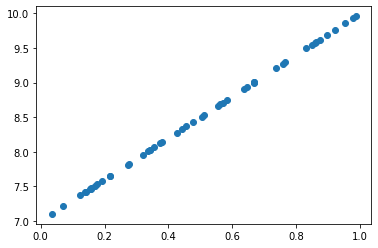

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Generazione dei dati 
n = 50             # numero di punti analizzati
X = np.random.rand(n)

true_beta = [7, 3]     # [intercetta, coef. angolare]

y_true = true_beta[0] + true_beta[1] * X

plt.scatter(X, y_true)
plt.show()

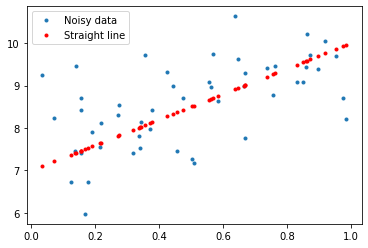

In [2]:
y = y_true + np.random.randn(n)     # aggiungo un errore gaussiano standard
plt.plot(X, y, '.', label = "Noisy data")
plt.plot(X, y_true, 'r.', label = "Straight line")
plt.legend()
plt.show()

### Regressione lineare via least squares estimation

Considera come riferimento https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods

Calcola i parametri $\beta$ della regressione e plotta il risultato ottenuto

$\hat{\beta} = (X^T X)^{-1} X^T Y$

0.1566229527855455 8.495565681589195


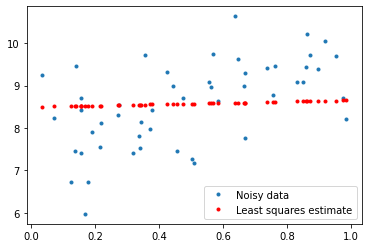

In [3]:
X_mean=np.mean(X)
y_mean=np.mean(y)
m=(sum((X-X_mean)*(y-y_mean)))/(sum((y-y_mean)**2))
q=y_mean-m*X_mean
print(m,q)
plt.plot(X, y, '.', label='Noisy data')
plt.plot(X, m*X+q, 'r.', label='Least squares estimate')
plt.legend()
plt.show()

### Regressione lineare via sklearn

Trova in sklearn ciò che fa al caso nostro e plotta il risultato ottenuto

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
dir(lin_reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

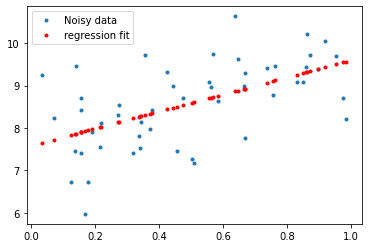

2.00364768045274 7.587582974224701


In [5]:
X=X.reshape(-1, 1)
y=y.reshape(-1,1)
lin_reg.fit(X, y)

extimated_beta=(lin_reg.coef_)[0][0]
intercept=lin_reg.intercept_

plt.plot(X, y, '.', label='Noisy data')
plt.plot(X, extimated_beta*X+intercept, 'r.', label='regression fit')
plt.legend()
plt.show()

print(extimated_beta, intercept[0])

### Regressione con batch gradient descent

Implementa la regressione tramite batch gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

number of iterations: 5583


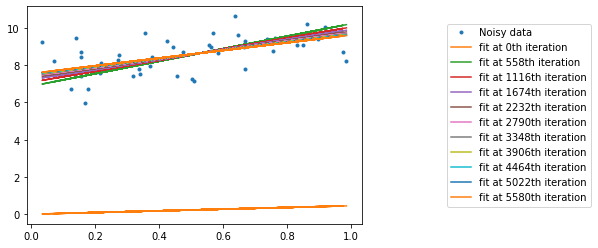

In [7]:
import time

def loss(x, y, beta, intercept):
    return 1/(2*(x.shape)[0])*(sum([(intercept+np.dot(beta,x[i])-y[i])**2 for i in range((x.shape)[0])]))


def Batch_Gradient_Descent(x, y, eps, learning_rate):
    start=time.process_time()
    beta=np.random.random((x.shape)[1])
    beta0=np.random.randint(0, 1)
    betas=[beta]
    betas0=[beta0]
    iterations=0
    error=loss(x,y,beta,beta0)
    while error>eps:
        grad=1/((x.shape)[0])*(sum([(beta0+np.dot(beta,x[i])-y[i])*x[i] for i in range((x.shape)[0])]))
        grad0=1/((x.shape)[0])*(sum([(beta0+np.dot(beta,x[i])-y[i]) for i in range((x.shape)[0])]))
        beta=beta-learning_rate*grad
        beta0=beta0-learning_rate*grad0
        betas.append(beta)
        betas0.append(beta0)
        error=abs(loss(x,y,beta,beta0)-error)
        iterations=iterations+1
    print(f'number of iterations: {iterations}')
    end=time.process_time()
    elapsed_time=end-start
    return elapsed_time, beta, beta0, betas, betas0

Fit=Batch_Gradient_Descent(X, y, 10**(-20), 0.01)
fit_slope=Fit[1][0]
fit_intercept=Fit[2][0]
betas=Fit[3]
betas0=Fit[4]
plt.plot(X, y, '.', label='Noisy data')
for i in range(0, len(betas), int(len(betas)/10)):
    plt.plot(X, betas[i]*X+betas0[i], label=f'fit at {i}th iteration')
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.show()

    

### Regressione con stochastic gradient descent

Implementa la regressione tramite stochastic gradient descent e plotta l'evoluzione della retta stimata con diversi iperparametri

number of iterations: 235372
elapsed time 70.14383544200001


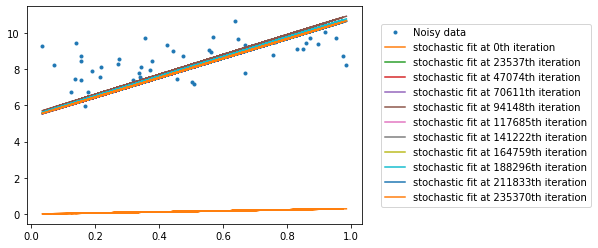

In [8]:
def Stochastic_Gradient_Descent(x, y, eps, learning_rate):
    start=time.process_time()
    beta=np.random.random((x.shape)[1])
    beta0=np.random.randint(0,1)
    betas=[beta]
    betas0=[beta0]
    error=loss(x,y,beta,beta0)
    iterations=0
    while error>eps:
        ind=np.random.randint(0, len(x)-1)
        grad=1/((x.shape)[0])*(beta0+np.dot(beta, x[ind])-y[ind])*x[ind]
        grad0=1/((x.shape)[0])*(beta0+np.dot(beta, x[ind])-y[ind])
        beta=beta-learning_rate*grad
        beta0=beta-learning_rate*grad0
        betas.append(beta)
        betas0.append(beta0)
        error=abs(loss(x,y,beta,beta0)-error)
        iterations=iterations+1
    print(f'number of iterations: {iterations}')
    end=time.process_time()
    elapsed_time=end-start
    print(f'elapsed time {elapsed_time}')
    return elapsed_time, beta, beta0, betas, betas0

Stoch_Fit=Stochastic_Gradient_Descent(X, y, 10**(-5), 0.5) #imposto errore più basso altrimenti il tempo di esecuzione diventa troppo alto
stoch_fit_slope=Stoch_Fit[1][0]
stoch_fit_intercept=Stoch_Fit[2][0]
stoch_betas=Stoch_Fit[3]
stoch_betas0=Stoch_Fit[4]
plt.plot(X, y, '.', label='Noisy data')
for i in range(0, len(stoch_betas), int(len(stoch_betas)/10)):
    plt.plot(X, stoch_betas[i]*X+stoch_betas0[i], label=f'stochastic fit at {i}th iteration')
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.show()

# Regressione lineare (parte 2 - max 1.5 punti)


Implementa una classe MyLinearRegression che abbia i seguenti metodi:
    - fit(X,y)
    - predict(X_test)
    - show_info
    
Un primissimo scheletro è proposto qui, ma è consigliabile (per maggiore chiarezza) aggiungere ulteriori metodi all'interno della classe.

In [9]:
import time

class MyLinearRegression:
    
    def __init__(self):
        self.eps=10**(-20)
        self.learning_rate=0.01
    
    def change_error(self):
        self.eps=input('Choose accuracy:')
        return (self.eps)
    
    def change_learning_rate(self):
        self.learning_rate=input('Choose learning rate:')
        return (self.learning_rate)
    
    def calculate_R_squared(self, X, y):
        y_mean=np.mean(y)
        ESS=sum([(np.dot((self.slope),X[i])-y_mean)**2 for i in range((X.shape)[0])])
        TSS=sum((y-y_mean)**2)
        return ESS/TSS
    
    def calculate_Adjusted_R_squared(self, X, y):
        y_mean=np.mean(y)
        num_of_obs=(X.shape)[0]
        regressors=(X.shape)[1]
        TSS=sum((y-y_mean)**2)
        RSS=sum([(np.dot((self.slope), X[i])-y[i])**2 for i in range((X.shape)[0])])
        return 1-(num_of_obs-1)/(num_of_obs-regressors-1)*RSS/TSS
        
    def fit(self, X, y):
        self.time, self.slope, self.intercept=(Batch_Gradient_Descent(X, y, self.eps, self.learning_rate))[0:3]
        self.loss=loss(X, y, self.slope, self.intercept)
        self.rsq=self.calculate_R_squared(X, y)
        self.adjrsq=self.calculate_Adjusted_R_squared(X, y)
        return (self.slope), (self.intercept), (self.time), (self.loss), (self.rsq), (self.adjrsq)
    
    def predict(self, X_test):
        return (self.slope)*X_test
    
    def show_info(self):
        #print("Loss = ", self.loss)
        print("R squared = ", self.rsq, "\nAdjusted R squared = ", self.adjrsq)
        print("Elapsed Time = ", self.time)


In [10]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X_d = diabetes['data']
y_d = diabetes['target']

model = MyLinearRegression()
model.fit(X_d, y_d)
model.show_info()

number of iterations: 2271
R squared =  3.9148062056770434 
Adjusted R squared =  -3.8866548450164142
Elapsed Time =  8.24856836299999
